Desafio Cat and Dog

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NO51i2ZfnehN3Zv8oFG6w-sp0vfANVN_
To: /content/cat_and_dog.rar
100% 671k/671k [00:00<00:00, 78.0MB/s]

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from cat_and_dog.rar

Extracting  cat_and_dog/cat/1.jpg                                          2%  OK 
Extracting  cat_and_dog/cat/10.jpg                                         7%  OK 
Extracting  cat_and_dog/cat/2.jpg                                         11%  OK 
Extracting  cat_and_d

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8000 - loss: 0.5681

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8000 - loss: 0.5681 - val_accuracy: 1.0000 - val_loss: 0.3832
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step - accuracy: 0.8000 - loss: 0.5441 - val_accuracy: 1.0000 - val_loss: 0.3702
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - accuracy: 0.8000 - loss: 0.5276 - val_accuracy: 1.0000 - val_loss: 0.3597
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step - accuracy: 0.8000 - loss: 0.5141 - val_accuracy: 1.0000 - val_loss: 0.3507
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - accuracy: 0.8000 - loss: 0.5025 - val_accuracy: 1.0000 - val_loss: 0.3427


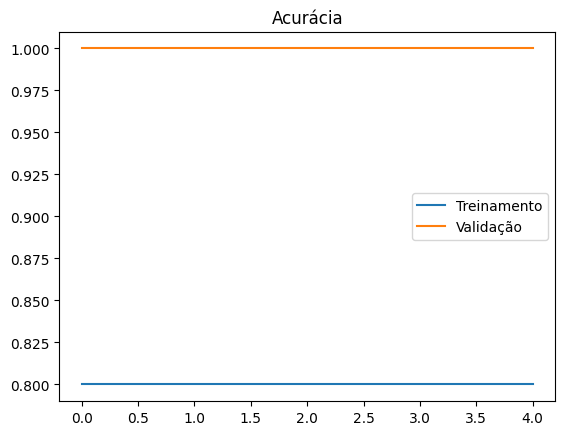

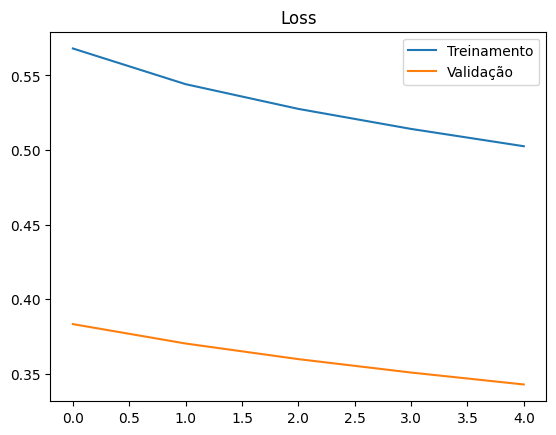

In [19]:
# ===============================
# Etapa 1: Importar bibliotecas
# ===============================
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ===============================
# Etapa 2: Instalar unrar e baixar arquivo RAR
# ===============================
!apt-get install unrar -y
!pip install -q gdown

file_id = '1NO51i2ZfnehN3Zv8oFG6w-sp0vfANVN_'
!gdown --id {file_id} --output cat_and_dog.rar

# ===============================
# Etapa 3: Extrair arquivo RAR
# ===============================
!unrar x -y cat_and_dog.rar

# ===============================
# Etapa 4: Definir diretórios das imagens originais
# ===============================
source_cat_dir = os.path.join("cat_and_dog", "cat")
source_dog_dir = os.path.join("cat_and_dog", "dog")

# ===============================
# Etapa 5: Criar diretórios para treino e validação
# ===============================
base_dir = 'cat_and_dog_filtered'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

for directory in [train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir]:
    os.makedirs(directory, exist_ok=True)

# ===============================
# Etapa 6: Função para separar dados treino/validação
# ===============================
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file_path = os.path.join(SOURCE, filename)
        if os.path.getsize(file_path) > 0:
            files.append(filename)

    train_size = int(len(files) * SPLIT_SIZE)
    shuffled = random.sample(files, len(files))
    train_files = shuffled[:train_size]
    val_files = shuffled[train_size:]

    for filename in train_files:
        copyfile(os.path.join(SOURCE, filename), os.path.join(TRAINING, filename))

    for filename in val_files:
        copyfile(os.path.join(SOURCE, filename), os.path.join(VALIDATION, filename))

split_data(source_cat_dir, train_cats_dir, validation_cats_dir, 0.8)
split_data(source_dog_dir, train_dogs_dir, validation_dogs_dir, 0.8)

# ===============================
# Etapa 7: Criar ImageDataGenerators
# ===============================
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary'
)

# ===============================
# Etapa 8: Criar modelo MobileNetV2 com Transfer Learning
# ===============================
IMG_SHAPE = (160, 160, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ===============================
# Etapa 9: Treinar o modelo
# ===============================
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

# ===============================
# Etapa 10: Visualizar resultados
# ===============================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Treinamento')
plt.plot(epochs, val_acc, label='Validação')
plt.title('Acurácia')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Treinamento')
plt.plot(epochs, val_loss, label='Validação')
plt.title('Loss')
plt.legend()
plt.show()
